Q1. Build linear and logistic regression using gradient descent on numpy only (Do not use other libraries like sklearn). Dataset for linear regressions can be found [here](https://archive.ics.uci.edu/ml/datasets/Wine+Quality). Dataset for logistic regression can be found [here](https://drive.google.com/file/d/1CReNesgs3iqZi08rr5a1h0YOci0BmC6H/view). The main focus here is not the accuracy of the model but the implementation of these algorithms from scratch. 

Q2. Use pandas to extract insights on this [dataset](https://drive.google.com/file/d/1Fwxy08NgMAVcUvsRVd94KEiqgmYSvOKA/view). \
[movie_metadata.csv](https://drive.google.com/file/d/1Fwxy08NgMAVcUvsRVd94KEiqgmYSvOKA/view) 

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# %load_ext autoreload
# %autoreload 2
import warnings
warnings.filterwarnings('ignore')

In [32]:
# df = pd.read_csv(r"C:\Users\KUDSIT\Desktop\rahul\databeat-task\Databeat AI\ML\dataset\winequality-red.csv",sep=";")
# df.head()

df = pd.read_csv(r"D:\This PC\Desktop\task\databeat-task\Databeat AI\ML\dataset\winequality-red.csv",sep=";")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### Data stats

In [33]:
# df['quality'].value_counts()

In [34]:
# df.describe()

In [35]:
# df.shape

### preprocessing

In [36]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [37]:
# No missing / Null value in either rows or columns

dub_df=df.copy()
dub_df.drop_duplicates(subset=None,inplace=True)

print(dub_df.shape)
print(df.shape)

# The shape is not same. Hence there were duplicate values in the dataset
df=dub_df

(1359, 12)
(1599, 12)


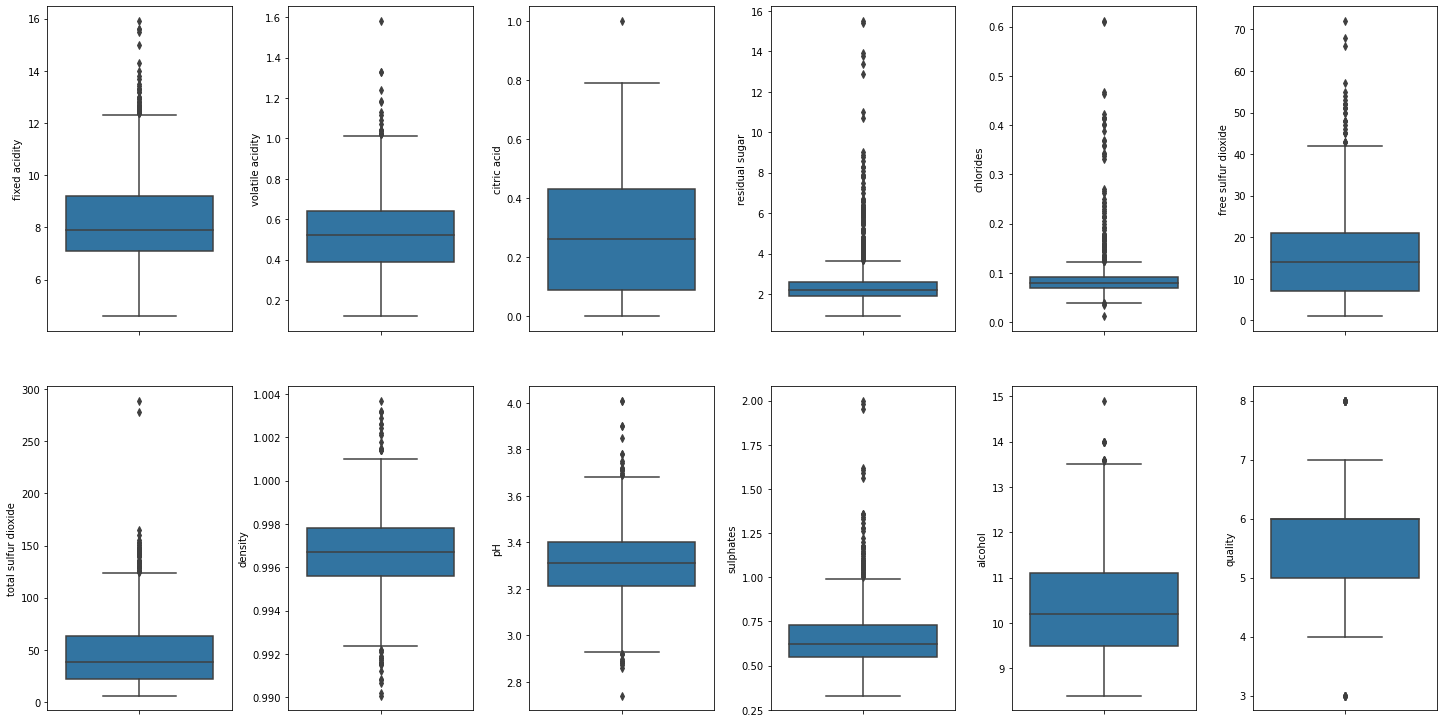

In [38]:
fig, ax = plt.subplots(ncols=6, nrows=2, figsize=(20,10))
index = 0
ax = ax.flatten()

for col, value in df.items():
    if col != 'type':
        sns.boxplot(y=col, data=df, ax=ax[index])
        index +=1
plt.tight_layout(pad=0.5,w_pad=0.7,h_pad=5.0)

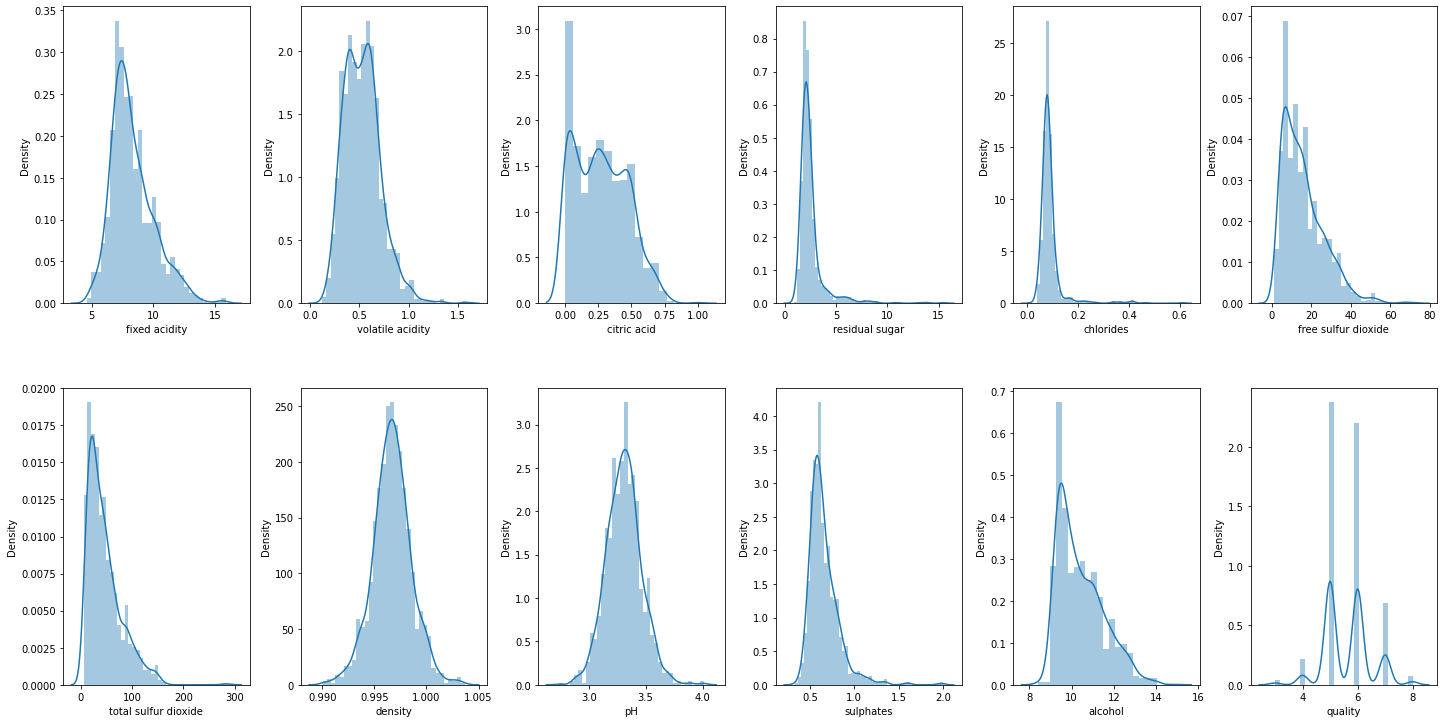

In [39]:
fig, ax = plt.subplots(ncols=6, nrows=2, figsize=(20,10))
index = 0
ax = ax.flatten()

for col, value in df.items():
    if col != 'type':
        sns.distplot(value, ax=ax[index])
        index +=1
plt.tight_layout(pad=0.5,w_pad=0.7,h_pad=5.0)

<AxesSubplot:xlabel='free sulfur dioxide', ylabel='Density'>

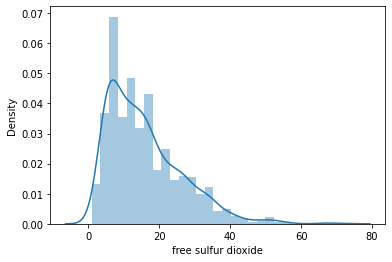

In [40]:
sns.distplot(df['free sulfur dioxide'])

<AxesSubplot:xlabel='alcohol', ylabel='Density'>

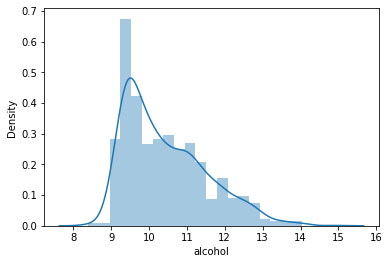

In [41]:
sns.distplot(df['alcohol'])


<AxesSubplot:xlabel='sulphates', ylabel='Density'>

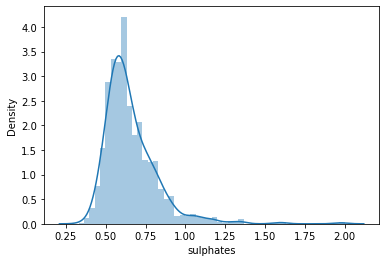

In [42]:
sns.distplot(df["sulphates"])

<AxesSubplot:xlabel='total sulfur dioxide', ylabel='Density'>

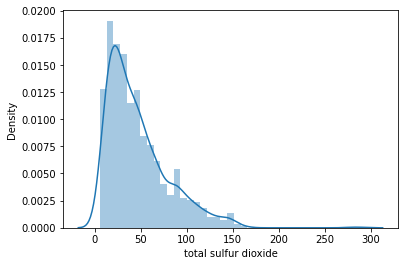

In [43]:
sns.distplot(df["total sulfur dioxide"])

<AxesSubplot:xlabel='residual sugar', ylabel='Density'>

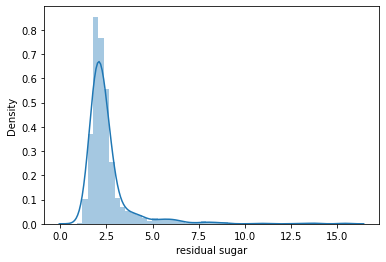

In [44]:
sns.distplot(df["residual sugar"])

AxesSubplot(0.125,0.125;0.775x0.755)


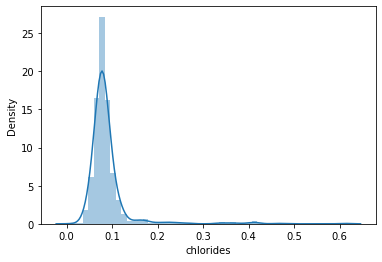

In [45]:
print(sns.distplot(df["chlorides"]))

In [46]:
# log transformation
df['free sulfur dioxide'] = np.log(1+df['free sulfur dioxide'])
df['alcohol'] = np.log(1+df['alcohol'])
df['sulphates'] = np.log(1+df['sulphates'])
df['total sulfur dioxide'] = np.log(1+df['total sulfur dioxide'])
df['residual sugar'] = np.log(1+df['residual sugar'])
df['chlorides'] = np.log(1+df['chlorides'])


AxesSubplot(0.125,0.125;0.775x0.755)


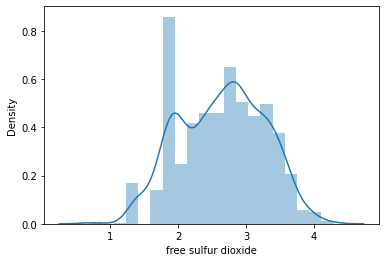

In [47]:
print(sns.distplot(df['free sulfur dioxide']))

AxesSubplot(0.125,0.125;0.775x0.755)


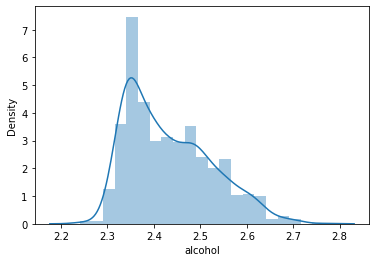

In [48]:
print(sns.distplot(df['alcohol']))

AxesSubplot(0.125,0.125;0.775x0.755)


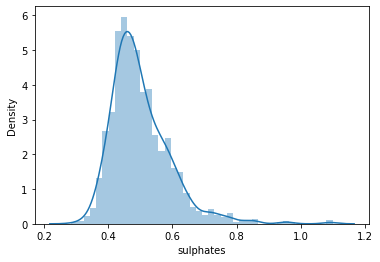

In [49]:
print(sns.distplot(df['sulphates']))

AxesSubplot(0.125,0.125;0.775x0.755)


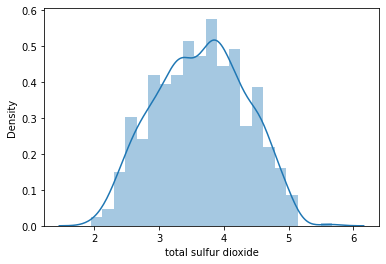

In [50]:
print(sns.distplot(df['total sulfur dioxide']))

AxesSubplot(0.125,0.125;0.775x0.755)


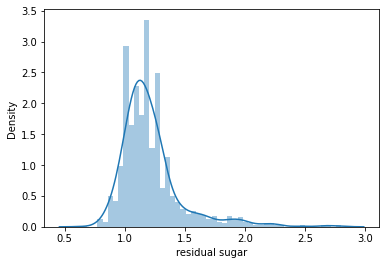

In [51]:
print(sns.distplot(df['residual sugar']))

AxesSubplot(0.125,0.125;0.775x0.755)


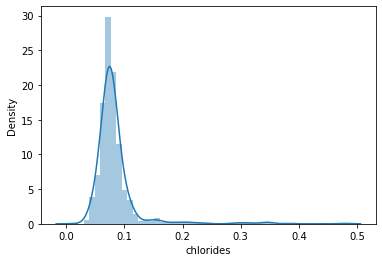

In [52]:
print(sns.distplot(df['chlorides']))

In [53]:
# round(100*(df.isnull().sum()/len(df)),2).sort_values(ascending=False)
# round(100*(df.isnull().sum(axis=1)/len(df)),2).sort_values(ascending=False)

<AxesSubplot:xlabel='quality', ylabel='count'>

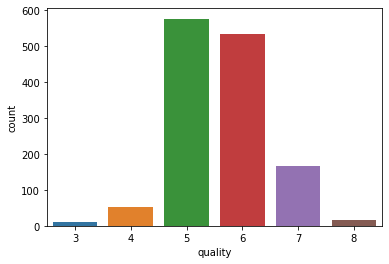

In [54]:
sns.countplot(df['quality'])

### model creation

In [55]:
from sklearn.model_selection import train_test_split
x= df.iloc[:,:11]
y = df['quality']
x_train, x_test, y_train, y_test=train_test_split(x,y,train_size=0.7,test_size=0.3,random_state=42)

In [56]:
from sklearn.preprocessing import StandardScaler

In [57]:
X_scaler = StandardScaler()
y_scaler = StandardScaler()
x_train = X_scaler.fit_transform(x_train)
#y_train = y_scaler.fit_transform(y_train)
x_test = X_scaler.transform(x_test)
#y_test = y_scaler.transform(y_test)
y_train = np.array(y_train).reshape(-1,1)
y_test = np.array(y_test).reshape(-1,1)

In [58]:
# y_train = y_scaler.fit_transform(y_train)
# y_test=y_scaler.fit_transform(y_test)

In [59]:
x_train

array([[ 3.31616196, -0.67010558,  1.8291926 , ..., -1.99985681,
         0.9914507 ,  0.40533753],
       [ 0.51968377, -0.387402  , -0.21861594, ..., -1.0626813 ,
        -0.93658712, -0.97102898],
       [ 2.44226252, -0.387402  ,  1.8291926 , ..., -2.13373903,
         1.33841761, -0.16339004],
       ...,
       [-0.87855533, -0.33086129, -0.98654415, ..., -0.05856467,
         0.00675991, -0.76343911],
       [ 0.34490388, -1.17897203,  0.19094577, ..., -0.92879908,
        -0.65841766,  0.0295024 ],
       [ 0.4614238 , -1.06589059,  0.75409311, ..., -0.86185797,
        -0.65841766,  0.94585186]])

In [60]:
y_train

array([[6],
       [5],
       [5],
       [6],
       [5],
       [5],
       [6],
       [5],
       [5],
       [5],
       [6],
       [5],
       [5],
       [6],
       [6],
       [4],
       [6],
       [5],
       [6],
       [7],
       [5],
       [6],
       [6],
       [6],
       [5],
       [5],
       [5],
       [5],
       [6],
       [5],
       [6],
       [4],
       [5],
       [5],
       [5],
       [7],
       [5],
       [6],
       [6],
       [6],
       [6],
       [7],
       [5],
       [6],
       [5],
       [6],
       [5],
       [6],
       [7],
       [6],
       [7],
       [6],
       [5],
       [6],
       [7],
       [5],
       [5],
       [5],
       [4],
       [5],
       [7],
       [7],
       [6],
       [4],
       [6],
       [5],
       [6],
       [8],
       [6],
       [5],
       [5],
       [6],
       [5],
       [5],
       [6],
       [7],
       [8],
       [6],
       [7],
       [6],
       [5],
       [5],
       [5],
    

In [61]:
x_test

array([[-0.35421567,  0.51724945, -1.191325  , ...,  0.20919976,
        -0.79659331, -0.86673978],
       [-0.06291586,  0.60206053, -0.88415372, ..., -0.12550578,
         0.6327861 ,  0.49730548],
       [ 0.05360407, -0.89626845,  0.80528833, ..., -0.92879908,
         0.9914507 ,  0.76864245],
       ...,
       [ 0.34490388,  0.3476273 ,  0.60050747, ...,  0.41002309,
        -0.45446172, -0.06651706],
       [ 0.9275035 , -1.17897203,  1.4708261 , ..., -1.0626813 ,
         0.51049308,  0.94585186],
       [ 1.04402343, -1.23551274,  0.39572662, ..., -0.46021132,
         1.1083681 ,  0.76864245]])

In [62]:
# y_test=y_scaler.fit_transform(y_test)
# y_test

### Method -1

In [22]:
X1 = x_train
Y1 = y_train

In [25]:
# Building the model
m = 0
b = 0

L = 0.0001  # The learning Rate
epochs = 1000  # The number of iterations to perform gradient descent

n = len(X1) # Number of elements in X1

# Performing Gradient Descent 
for i in range(epochs): 
    Y_pred = m*X1 + b  # The current predicted value of Y1
    cost = (1/n) * sum([val**2 for val in (Y1-Y_pred)])
    D_m = (-2/n) * sum(X1 * (Y1 - Y_pred))  # Derivative wrt m
    D_c = (-2/n) * sum(Y1 - Y_pred)  # Derivative wrt b
    m = m - L * D_m  # Update m
    b = b - L * D_c  # Update b
    print("cost {}, epochs {}".format(cost,i))
# m {}, b {},
# m,b,
print (m, b)

cost [32.31440589 32.31440589 32.31440589 32.31440589 32.31440589 32.31440589
 32.31440589 32.31440589 32.31440589 32.31440589 32.31440589], epochs 0
cost [32.30174821 32.30171303 32.30173735 32.30175268 32.30174889 32.30175245
 32.30174385 32.30174421 32.30175074 32.30173469 32.30169417], epochs 1
cost [32.2890956  32.28902524 32.28907388 32.28910453 32.28909695 32.28910407
 32.28908687 32.28908759 32.28910065 32.28906855 32.28898754], epochs 2
cost [32.27644805 32.27634253 32.27641547 32.27646144 32.27645007 32.27646075
 32.27643495 32.27643603 32.27645562 32.27640748 32.27628599], epochs 3
cost [32.26380556 32.26366489 32.26376213 32.2638234  32.26380825 32.26382249
 32.2637881  32.26378954 32.26381565 32.26375148 32.26358951], epochs 4
cost [32.25116812 32.25099232 32.25111385 32.25119042 32.25117149 32.25118928
 32.2511463  32.2511481  32.25118073 32.25110054 32.25089812], epochs 5
cost [32.23853574 32.23832483 32.23847062 32.2385625  32.23853978 32.23856112
 32.23850956 32.238511

In [26]:
# Making predictions
Y_pred = m*X1 + b
print(Y_pred)

[[1.08317269 1.05790999 1.08457625 ... 1.04491622 1.05435558 1.04409567]
 [1.02961335 1.04177318 1.0119017  ... 1.03308069 0.98647786 0.95449652]
 [1.0664354  1.04177318 1.08457625 ... 1.04660702 1.06793113 1.00569603]
 ...
 [1.00283368 1.03854582 0.98464875 ... 1.02039976 1.01815413 0.9672964 ]
 [1.02626589 1.08695625 1.02643661 ... 1.0313899  0.99552823 1.01849591]
 [1.02849753 1.08050153 1.04642211 ... 1.0305445  0.99552823 1.0824953 ]]


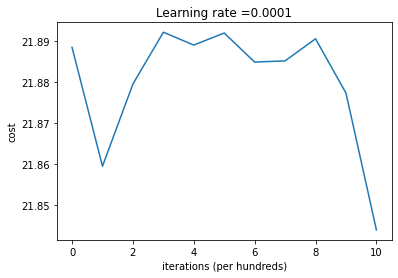

In [30]:
# Plot learning curve (with costs)
# costs = np.squeeze(logistic_regression_model['costs'])
plt.plot(cost)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(L))
plt.show()

### Method

In [94]:
X1 = x_train
Y1 = y_train

In [95]:
# Building the model
m = 0
c = 0

L = 0.0001  # The learning Rate
epochs = 1000  # The number of iterations to perform gradient descent

n = float(len(X1)) # Number of elements in X1

# Performing Gradient Descent 
for i in range(epochs): 
    Y_pred = m*X1 + c  # The current predicted value of Y1
    D_m = (-2/n) * sum(X1 * (Y1 - Y_pred))  # Derivative wrt m
    D_c = (-2/n) * sum(Y1 - Y_pred)  # Derivative wrt c
    m = m - L * D_m  # Update m
    c = c - L * D_c  # Update c
    
print (m, c)

[ 0.01915243 -0.05708032  0.03548894  0.00106854 -0.01883107 -0.00493074
 -0.02363154 -0.02638439 -0.01262894  0.04248596  0.06991958] [1.01966015 1.01966015 1.01966015 1.01966015 1.01966015 1.01966015
 1.01966015 1.01966015 1.01966015 1.01966015 1.01966015]


In [98]:
# Making predictions
Y_pred = m*X1 + c
print(Y_pred)

[[1.08317269 1.05790999 1.08457625 ... 1.04491622 1.06178289 1.04800118]
 [1.02961335 1.04177318 1.0119017  ... 1.03308069 0.97986834 0.95176621]
 [1.0664354  1.04177318 1.08457625 ... 1.04660702 1.07652411 1.00823599]
 ...
 [1.00283368 1.03854582 0.98464875 ... 1.02039976 1.01994735 0.96628081]
 [1.02626589 1.08695625 1.02643661 ... 1.0313899  0.99168664 1.02172294]
 [1.02849753 1.08050153 1.04642211 ... 1.0305445  0.99168664 1.08579371]]


ValueError: x and y must be the same size

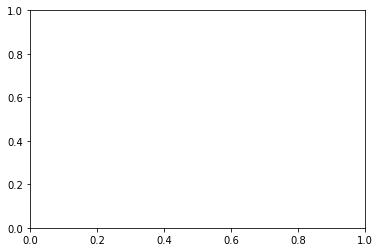

In [13]:
plt.scatter(x_train,y_train)
plt.scatter(x_train,Y_pred)
plt.show()

## Linear Regression

$$y^{(i)} = m^T x^{(i)} + b \tag{1}$$

$$z^{(i)} = w^T x^{(i)} + b \tag{1}$$

### Method 1

In [104]:
# Building the model
m = 0
c = 0

L = 0.0001  # The learning Rate
epochs = 10  # The number of iterations to perform gradient descent

n = float(len(x)) # Number of elements in x

# Performing Gradient Descent 
for i in range(epochs): 
    Y_pred = m*x + c  # The current predicted value of y
    D_m = (-2/n) * np.sum(x * (y - Y_pred))  # Derivative wrt m
    D_c = (-2/n) * np.sum(y - Y_pred)  # Derivative wrt c
    m = m - L * D_m  # Update m
    c = c - L * D_c  # Update c
    
print (m, c)

0                       0.0
1                       0.0
2                       0.0
3                       0.0
5                       0.0
                       ... 
pH                      0.0
residual sugar          0.0
sulphates               0.0
total sulfur dioxide    0.0
volatile acidity        0.0
Length: 1370, dtype: float64 0                       0.0
1                       0.0
2                       0.0
3                       0.0
5                       0.0
                       ... 
pH                      0.0
residual sugar          0.0
sulphates               0.0
total sulfur dioxide    0.0
volatile acidity        0.0
Length: 1370, dtype: float64


In [105]:
# Making predictions
Y_pred = m*x + c

# plt.scatter(x, y)
# plt.plot([min(x), max(x)], [min(Y_pred), max(Y_pred)], color='red') # predicted
# plt.show()

In [106]:
Y_pred

,0,1,2,3,5,6,7,8,9,10,...,chlorides,citric acid,density,fixed acidity,free sulfur dioxide,pH,residual sugar,sulphates,total sulfur dioxide,volatile acidity
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1593,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1594,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1595,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1597,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Method 2

In [107]:
x=x_train
y=y_train

In [110]:
m=0
b=0

Learning_Rate = 0.01
epochs = 10

n = np.float(x.shape[0])
error = []

for i in range(epochs):
    y_hat = m*x +b
    mse = (1/n) * np.sum((y-y_hat)**2)
    error.append(mse)

    derivative_m = (-2/n)*np.sum(x*(y-y_hat))
    derivative_b = (-2/n)*np.sum(y-y_hat)

    m = m-Learning_Rate * derivative_m
    b = b-Learning_Rate * derivative_b

x_line = np.linspace(0,15,100)  
y_line = m*x_line + b 

print(y_line)


# plt.figure(figsize=(8,6))

# plt.title("quality of wine")
# plt.plot(x_line,y_line)
# plt.scatter(x,y)
# plt.show()



[5.15575116 5.15746644 5.15918173 5.16089702 5.1626123  5.16432759
 5.16604288 5.16775816 5.16947345 5.17118874 5.17290402 5.17461931
 5.1763346  5.17804989 5.17976517 5.18148046 5.18319575 5.18491103
 5.18662632 5.18834161 5.19005689 5.19177218 5.19348747 5.19520275
 5.19691804 5.19863333 5.20034861 5.2020639  5.20377919 5.20549447
 5.20720976 5.20892505 5.21064033 5.21235562 5.21407091 5.21578619
 5.21750148 5.21921677 5.22093205 5.22264734 5.22436263 5.22607791
 5.2277932  5.22950849 5.23122377 5.23293906 5.23465435 5.23636963
 5.23808492 5.23980021 5.24151549 5.24323078 5.24494607 5.24666135
 5.24837664 5.25009193 5.25180722 5.2535225  5.25523779 5.25695308
 5.25866836 5.26038365 5.26209894 5.26381422 5.26552951 5.2672448
 5.26896008 5.27067537 5.27239066 5.27410594 5.27582123 5.27753652
 5.2792518  5.28096709 5.28268238 5.28439766 5.28611295 5.28782824
 5.28954352 5.29125881 5.2929741  5.29468938 5.29640467 5.29811996
 5.29983524 5.30155053 5.30326582 5.3049811  5.30669639 5.30841

### Method 3

In [141]:
def hypothesis(b, w, X):
    return b+w.T*X
def cost_calc(b, w, X, y):
    return (1/2*m) * np.sum((hypothesis(b, w, X) - y)**2)

https://miro.medium.com/max/282/1*5_3TeXfjy-2uTXEe1dms9A.png

In [142]:
m = len(x_train)
def gradient_descent(b,w, X, y, epoch, alpha):
    cost = []
    i = 0
    while i < epoch:
        hx = hypothesis(b,w, X)
        # print(hx)
        b -= alpha*(np.sum(hx - y)/m)
        w -= (alpha * np.sum((hx - y) * X))/m
        cost.append(cost_calc(b,w, X, y))
        i += 1
    return b,w, cost

In [143]:
def predict(b, w, X, y, epoch, alpha):
    b, w, cost = gradient_descent(b, w, X, y, epoch, alpha)
    return hypothesis(b, w, X), cost, b, w

In [144]:
# def predict(theta, X, y, epoch, alpha):
#     theta, cost = gradient_descent(theta, X, y, epoch, alpha)
#     return hypothesis(theta, X), cost, theta

In [145]:
# x = ["fixed acidity","volatile acidity","citric acid","residual sugar","chlorides","free sulfur dioxide","total sulfur dioxide","density","pH","sulphates","alcohol"]
# y = ["quality"]

In [146]:
y_predict, cost, b, w = predict(b, w , x_train, y_train, 10, 0.01)

ValueError: operands could not be broadcast together with shapes (1,2) (951,11) 

In [117]:
print(b, w)

5.155751157504916 [[0.]
 [0.]]


In [ ]:
# %matplotlib inline
# import matplotlib.pyplot as plt
# plt.figure()
# plt.scatter(df[x], df[y], label = 'Original y')
# plt.scatter(df[x], y_predict, label = 'predicted y')
# plt.legend(loc = "upper left")
# plt.xlabel("input feature")
# plt.ylabel("Original and Predicted Output")
# plt.show()

### Method 4

In [154]:
def feature_normalize(X):
    '''
    Returns a normalized version of X where
    the mean value of each feature is 0 and the standard deviation
    is 1. This is often a good preprocessing step to do when
    working with learning algorithms.
    '''
    mean_r = []
    std_r = []

    X_norm = X

    n_c = X.shape[1]
    for i in range(n_c):
        m = np.mean(X[:, i])
        s = np.std(X[:, i])
        mean_r.append(m)
        std_r.append(s)
        X_norm[:, i] = (X_norm[:, i] - m) / s

    return X_norm, mean_r, std_r


def compute_cost(X, y, theta):
    '''
    Comput cost for linear regression
    '''
    #Number of training samples
    m = y.size

    predictions = X.dot(theta)

    sqErrors = (predictions - y)

    J = (1.0 / (2 * m)) * sqErrors.T.dot(sqErrors)

    return J


def gradient_descent(X, y, theta, alpha, num_iters):
    '''
    Performs gradient descent to learn theta
    by taking num_items gradient steps with learning
    rate alpha
    '''
    m = y.size
    J_history = zeros(shape=(num_iters, 1))

    for i in range(num_iters):

        predictions = X.dot(theta)

        theta_size = theta.size

        for it in range(theta_size):

            temp = X[:, it]
            temp.shape = (m, 1)

            errors_x1 = (predictions - y) * temp

            theta[it][0] = theta[it][0] - alpha * (1.0 / m) * errors_x1.sum()

        J_history[i, 0] = compute_cost(X, y, theta)

    return theta, J_history

In [155]:
#GRADIENT DESCENT

alpha = 0.01 #Step size
iterations = 2000 #No. of iterations
m = y_train.size #No. of data points
np.random.seed(123) #Set the seed
theta = np.random.rand(2) #Pick some random values to start with


#GRADIENT DESCENT
def gradient_descent(x, y, theta, iterations, alpha):
    past_costs = []
    past_thetas = [theta]
    for i in range(iterations):
        prediction = np.dot(x, theta)
        error = prediction - y
        cost = 1/(2*m) * np.dot(error.T, error)
        past_costs.append(cost)
        theta = theta - (alpha * (1/m) * np.dot(x.T, error))
        past_thetas.append(theta)
        
    return past_thetas, past_costs

#Pass the relevant variables to the function and get the new values back...
past_thetas, past_costs = gradient_descent(x_train, y_train, theta, iterations, alpha)
theta = past_thetas[-1]

#Print the results...
print("Gradient Descent: {:.2f}, {:.2f}".format(theta[0], theta[1]))

ValueError: shapes (951,11) and (2,) not aligned: 11 (dim 1) != 2 (dim 0)

### Method 5

In [131]:
def weightInitialization(n_features):
    w = np.zeros((1,n_features))
    b = 0
    return w,b

In [138]:
def model_optimize(w,b,X,Y):
    #
    m = X.shape[0]
    #
    final_result = np.dot(w, X.T) + b
    cost = (1/m)*np.sum((Y.T - final_result) ** 2)
    #
    dw = (-2/m)*np.sum((np.dot(X.T,(Y.T - final_result).T)))
    db = (-2/m)*np.sum(((Y.T - final_result)))
    #
    grads = {"dw": dw, "db": db}
    
    return grads, cost

In [133]:
def gradientUpdate(w,b,X, Y, learning_rate, no_iterations):
    costs = []
    for i in range(no_iterations):
        #
        grads, cost = model_optimize(w,b, X,Y)
        #
        dw = grads["dw"]
        db = grads["db"]
        #Weight Update
        w = w - (learning_rate*dw)
        b = b - (learning_rate*db)
        #
        
        costs.append(cost)
    #
    
    coeff = {"w": w, "b": b}
    gradient = {"dw": dw, "db": db}
    
    return coeff, gradient, costs

In [134]:
def predict(x,w,b):
    final_pred = np.dot(w, x.T) + b
    return final_pred

In [136]:
import time

In [139]:
start_time = time.time()
#
#Get number of features
n_features = x_train.shape[1]
m_tr = x_train.shape[0]
m_ts = x_test.shape[0]
print('Number of Features', n_features)
# initializing weights
w, b = weightInitialization(n_features)
#Gradient Descent
coeff, gradient, costs = gradientUpdate(w, b, x_train, y_train, learning_rate=0.0001,no_iterations=20)
#Final prediction
w = coeff["w"]
b = coeff["b"]
print('Optimized weights', w)
print('Optimized intercept',b)
#
final_tr_pred = predict(x_train, w,b)
final_tr_cost = (1/m_tr)*np.sum((y_train.T - final_tr_pred) ** 2)
print('Training error',final_tr_cost)
#
final_ts_pred = predict(x_test, w,b)
final_ts_cost = (1/m_ts)*np.sum((y_test.T - final_ts_pred) ** 2)
print('Test error',final_ts_cost)
#
print('Model R^2 Square value', metrics.r2_score(y_test, final_ts_pred.T))
#
print("--- %s seconds ---" % (time.time() - start_time))

Number of Features 11


ValueError: Length of passed values is 1, index implies 951.

## Logistic regression

In [65]:
# GRADED FUNCTION: sigmoid

def sigmoid(z):
    """
    Compute the sigmoid of z

    Arguments:
    z -- A scalar or numpy array of any size.

    Return:
    s -- sigmoid(z)
    """

    #(≈ 1 line of code)
    # s = ...
    # YOUR CODE STARTS HERE
    s = 1/(1+np.exp(-z))
    
    # YOUR CODE ENDS HERE
    
    return s

In [66]:
# GRADED FUNCTION: initialize_with_zeros

def initialize_with_zeros(dim):
    """
    This function creates a vector of zeros of shape (dim, 1) for w and initializes b to 0.
    
    Argument:
    dim -- size of the w vector we want (or number of parameters in this case)
    
    Returns:
    w -- initialized vector of shape (dim, 1)
    b -- initialized scalar (corresponds to the bias) of type float
    """
    
    # (≈ 2 lines of code)
    # w = ...
    # b = ...
    # YOUR CODE STARTS HERE
    w = np.zeros((dim))
    b = 0.0
    
    # YOUR CODE ENDS HERE

    return w, b

In [68]:
dim = 1
w, b = initialize_with_zeros(dim)

assert type(b) == float
print ("w = " + str(w))
print ("b = " + str(b))



w = [0.]
b = 0.0


In [69]:
# GRADED FUNCTION: propagate  

def propagate(w, b, X, Y):
    """
    Implement the cost function and its gradient for the propagation explained above

    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of size (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat) of size (1, number of examples)

    Return:
    cost -- negative log-likelihood cost for logistic regression
    dw -- gradient of the loss with respect to w, thus same shape as w
    db -- gradient of the loss with respect to b, thus same shape as b
    
    Tips:
    - Write your code step by step for the propagation. np.log(), np.dot()
    """
    
    m = X.shape[1]
    
    # FORWARD PROPAGATION (FROM X TO COST)
    #(≈ 2 lines of code)
    # compute activation
    # A = ...
    # compute cost by using np.dot to perform multiplication. 
    # And don't use loops for the sum.
    # cost = ...                                
    # YOUR CODE STARTS HERE
    A = sigmoid(np.dot(w.T,X) + b)
    # print(w)
    # print(X)
    # print(b)
    cost = -(np.sum((np.log(A)*Y)+((1-Y)*(np.log(1-A)))))/m
    
    # YOUR CODE ENDS HERE

    # BACKWARD PROPAGATION (TO FIND GRAD)
    #(≈ 2 lines of code)
    # dw = ...
    # db = ...
    # YOUR CODE STARTS HERE
    dw = (np.dot(X,(A-Y).T))/m
    db = (np.sum(A-Y))/m
    
    # YOUR CODE ENDS HERE
    cost = np.squeeze(np.array(cost))

    
    grads = {"dw": dw,
             "db": db}
    
    return grads, cost

In [70]:
# GRADED FUNCTION: optimize

def optimize(w, b, X, Y, num_iterations=100, learning_rate=0.009, print_cost=False):
    """
    This function optimizes w and b by running a gradient descent algorithm
    
    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of shape (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat), of shape (1, number of examples)
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- True to print the loss every 100 steps
    
    Returns:
    params -- dictionary containing the weights w and bias b
    grads -- dictionary containing the gradients of the weights and bias with respect to the cost function
    costs -- list of all the costs computed during the optimization, this will be used to plot the learning curve.
    
    Tips:
    You basically need to write down two steps and iterate through them:
        1) Calculate the cost and the gradient for the current parameters. Use propagate().
        2) Update the parameters using gradient descent rule for w and b.
    """
    
    # w = copy.deepcopy(w)
    # b = copy.deepcopy(b)
    
    costs = []
    
    for i in range(num_iterations):
        # (≈ 1 lines of code)
        # Cost and gradient calculation 
        # grads, cost = ...
        # YOUR CODE STARTS HERE
        
        grads, cost = propagate(w, b, X, Y)
        # YOUR CODE ENDS HERE
        
        # Retrieve derivatives from grads
        dw = grads["dw"]
        db = grads["db"]
        
        # update rule (≈ 2 lines of code)
        # w = ...
        # b = ...
        # YOUR CODE STARTS HERE
        w = w-(learning_rate*dw)
        b = b-(learning_rate*db)
        
        # YOUR CODE ENDS HERE
        
        # Record the costs
        if i % 100 == 0:
            costs.append(cost)
        
            # Print the cost every 100 training iterations
            if print_cost:
                print ("Cost after iteration %i: %f" %(i, cost))
    
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs

In [71]:
# GRADED FUNCTION: predict

def predict(w, b, X):
    '''
    Predict whether the label is 0 or 1 using learned logistic regression parameters (w, b)
    
    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of size (num_px * num_px * 3, number of examples)
    
    Returns:
    Y_prediction -- a numpy array (vector) containing all predictions (0/1) for the examples in X
    '''
 
    m = X.shape[1]
    Y_prediction = np.zeros((1, m))
    w = w.reshape(X.shape[0], 1)
    
    # Compute vector "A" predicting the probabilities of a cat being present in the picture
    #(≈ 1 line of code)
    # A = ...
    # YOUR CODE STARTS HERE
    A = sigmoid(np.dot(w.T,X)+b)
    
    # YOUR CODE ENDS HERE
    
    for i in range(A.shape[1]):
        
        # Convert probabilities A[0,i] to actual predictions p[0,i]
        #(≈ 4 lines of code)
        # if A[0, i] > ____ :
        #     Y_prediction[0,i] = 
        # else:
        #     Y_prediction[0,i] = 
        # YOUR CODE STARTS HERE
        if A[0, i]<=0.5 :
            Y_prediction[0,i] = 0
        else:
            Y_prediction[0,i] = 1

        
        # YOUR CODE ENDS HERE
    
    return Y_prediction





# class_names = [3,4,5,6,7,8]
# class_names[np.argmax(predictions)]

In [162]:
df.quality.value_counts()

5    577
6    535
7    167
4     53
8     17
3     10
Name: quality, dtype: int64

In [163]:
# GRADED FUNCTION: model

def model(X_train, Y_train, X_test, Y_test, num_iterations=2000, learning_rate=0.5, print_cost=False):
    """
    Builds the logistic regression model by calling the function you've implemented previously
    
    Arguments:
    X_train -- training set represented by a numpy array of shape (num_px * num_px * 3, m_train)
    Y_train -- training labels represented by a numpy array (vector) of shape (1, m_train)
    X_test -- test set represented by a numpy array of shape (num_px * num_px * 3, m_test)
    Y_test -- test labels represented by a numpy array (vector) of shape (1, m_test)
    num_iterations -- hyperparameter representing the number of iterations to optimize the parameters
    learning_rate -- hyperparameter representing the learning rate used in the update rule of optimize()
    print_cost -- Set to True to print the cost every 100 iterations
    
    Returns:
    d -- dictionary containing information about the model.
    """
    # (≈ 1 line of code)   
    # initialize parameters with zeros 
    # w, b = ...
    
    #(≈ 1 line of code)
    # Gradient descent 
    # params, grads, costs = ...
    
    # Retrieve parameters w and b from dictionary "params"
    # w = ...
    # b = ...
    
    # Predict test/train set examples (≈ 2 lines of code)
    # Y_prediction_test = ...
    # Y_prediction_train = ...
    
    # YOUR CODE STARTS HERE
    # initialize parameters with zeros 
    w, b = initialize_with_zeros(X_train.shape[0])
    
    
    # Gradient descent 
    params, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)
    
    # Retrieve parameters w and b from dictionary "params"
    w = params["w"]
    b = params["b"]
    
    # Predict test/train set examples (≈ 2 lines of code)
    Y_prediction_test = predict(w,b,X_test)
    Y_prediction_train = predict(w,b,X_train)
    
    # YOUR CODE ENDS HERE

    # Print train/test Errors
    # if print_cost:
    #     print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    #     print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

    
    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

In [164]:
# x_train = np.array(x_train)
# y_train = np.array(y_train)
# x_test = np.array(x_test)
# y_test = np.array(y_test)

In [165]:
logistic_regression_model = model(x_train, y_train, x_test, y_test, num_iterations=20, learning_rate=0.005)

ValueError: cannot reshape array of size 904401 into shape (408,1)

In [ ]:
# convert features to numpy array


## Q2. Use pandas to extract insights on this [dataset](https://drive.google.com/file/d/1Fwxy08NgMAVcUvsRVd94KEiqgmYSvOKA/view)

In [1]:
import pandas as pd

In [3]:
df = pd.read_csv(r"D:\This PC\Desktop\task\databeat-task\Databeat AI\ML\dataset\movie_metadata.csv")

In [5]:
type(df)

pandas.core.frame.DataFrame

In [6]:
len(df)

5043

In [7]:
df.shape

(5043, 28)

In [9]:
df.head(10)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000
6,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,...,1902.0,English,USA,PG-13,258000000.0,2007.0,11000.0,6.2,2.35,0
7,Color,Nathan Greno,324.0,100.0,15.0,284.0,Donna Murphy,799.0,200807262.0,Adventure|Animation|Comedy|Family|Fantasy|Musi...,...,387.0,English,USA,PG,260000000.0,2010.0,553.0,7.8,1.85,29000
8,Color,Joss Whedon,635.0,141.0,0.0,19000.0,Robert Downey Jr.,26000.0,458991599.0,Action|Adventure|Sci-Fi,...,1117.0,English,USA,PG-13,250000000.0,2015.0,21000.0,7.5,2.35,118000
9,Color,David Yates,375.0,153.0,282.0,10000.0,Daniel Radcliffe,25000.0,301956980.0,Adventure|Family|Fantasy|Mystery,...,973.0,English,UK,PG,250000000.0,2009.0,11000.0,7.5,2.35,10000


In [11]:
df.tail()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
5038,Color,Scott Smith,1.0,87.0,2.0,318.0,Daphne Zuniga,637.0,NaN,Comedy|Drama,...,6.0,English,Canada,NaN,NaN,2013.0,470.0,7.7,NaN,84
5039,Color,NaN,43.0,43.0,NaN,319.0,Valorie Curry,841.0,NaN,Crime|Drama|Mystery|Thriller,...,359.0,English,USA,TV-14,NaN,NaN,593.0,7.5,16.00,32000
5040,Color,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,NaN,Drama|Horror|Thriller,...,3.0,English,USA,NaN,1400.0,2013.0,0.0,6.3,NaN,16
5041,Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,10443.0,Comedy|Drama|Romance,...,9.0,English,USA,PG-13,NaN,2012.0,719.0,6.3,2.35,660
5042,Color,Jon Gunn,43.0,90.0,16.0,16.0,Brian Herzlinger,86.0,85222.0,Documentary,...,84.0,English,USA,PG,1100.0,2004.0,23.0,6.6,1.85,456


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_for_reviews     4993 non-null   float64
 3   duration                   5028 non-null   float64
 4   director_facebook_likes    4939 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5036 non-null   float64
 8   gross                      4159 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5036 non-null   object 
 11  movie_title                5043 non-null   object 
 12  num_voted_users            5043 non-null   int64  
 13  cast_total_facebook_likes  5043 non-null   int64

In [15]:
df.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,4993.000000,5028.000000,4939.000000,5020.000000,5036.000000,4.159000e+03,5.043000e+03,5043.000000,5030.000000,5022.000000,4.551000e+03,4935.000000,5030.000000,5043.000000,4714.000000,5043.000000
mean,140.194272,107.201074,686.509212,645.009761,6560.047061,4.846841e+07,8.366816e+04,9699.063851,1.371173,272.770808,3.975262e+07,2002.470517,1651.754473,6.442138,2.220403,7525.964505
std,121.601675,25.197441,2813.328607,1665.041728,15020.759120,6.845299e+07,1.384853e+05,18163.799124,2.013576,377.982886,2.061149e+08,12.474599,4042.438863,1.125116,1.385113,19320.445110
min,1.000000,7.000000,0.000000,0.000000,0.000000,1.620000e+02,5.000000e+00,0.000000,0.000000,1.000000,2.180000e+02,1916.000000,0.000000,1.600000,1.180000,0.000000
25%,50.000000,93.000000,7.000000,133.000000,614.000000,5.340988e+06,8.593500e+03,1411.000000,0.000000,65.000000,6.000000e+06,1999.000000,281.000000,5.800000,1.850000,0.000000
50%,110.000000,103.000000,49.000000,371.500000,988.000000,2.551750e+07,3.435900e+04,3090.000000,1.000000,156.000000,2.000000e+07,2005.000000,595.000000,6.600000,2.350000,166.000000
75%,195.000000,118.000000,194.500000,636.000000,11000.000000,6.230944e+07,9.630900e+04,13756.500000,2.000000,326.000000,4.500000e+07,2011.000000,918.000000,7.200000,2.350000,3000.000000
max,813.000000,511.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,1.221550e+10,2016.000000,137000.000000,9.500000,16.000000,349000.000000


In [16]:
df["color"] == "NaN"

0       False
1       False
2       False
3       False
4       False
        ...  
5038    False
5039    False
5040    False
5041    False
5042    False
Name: color, Length: 5043, dtype: bool

In [18]:
df.columns


Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')